# Import & Load

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from numba import jit

In [ ]:
list_X_y = pickle.load(open('/content/drive/MyDrive/Datasets/bear_plk/list_X_y.sav', 'rb'))
X , y = list_X_y[0], list_X_y[1]
items= pickle.load(open('/content/drive/MyDrive/Datasets/bear_plk/items.sav', 'rb'))
df,class_names = items[0], items[1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42,stratify = y)
num_classes = 3
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
X_train = tf.expand_dims(np.array(X_train), -1)
X_test = tf.expand_dims(np.array(X_test), -1)

from collections import Counter
Counter(y_test)

Counter({0: 10, 1: 10, 2: 9})

# Deep IA part

### utils

In [ ]:
def plot_history(history):
  print("nb d'epoch enregistrés :",len(history.history['accuracy']))
# list all data in history
  #print(history.history.keys())
  # summarize history for accuracy
  plt.figure(figsize=(20,6))
  plt.subplot(122)
  #plt.vlines(x = len(history.history['accuracy']))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  # summarize history for loss
  plt.subplot(121)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
X_train.shape

TensorShape([259, 300, 400, 3, 1])

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 842555156492959395
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4942579447758604640
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### V 0.0

In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### First convolution & max-pooling
                             layers.Conv2D(8, kernel_size=(4, 4), activation="relu", padding="same"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Second convolution & max-pooling
                             layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),

    ### One fully connected
                             layers.Dense(10, activation="relu"),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    
    ### Model compilation
  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 400, 8)       392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 200, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 198, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 99, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 117216)            0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=16,
          epochs=12,
          validation_split=0.2,
          callbacks=[callback]
          )

In [ ]:
len(history.history['accuracy'])

7

nb d'epoch enregistrés : 7


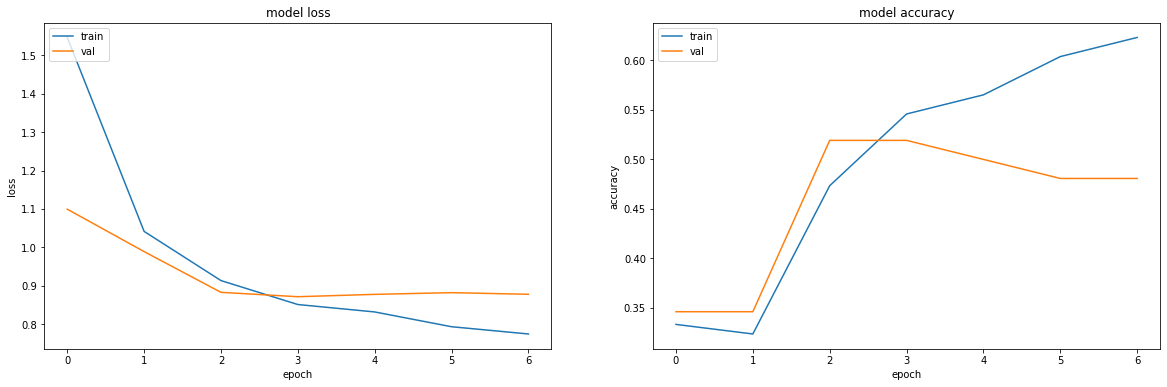

In [ ]:
plot_history(history)

### V 1.0

In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(10, activation="relu"),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_14 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 147, 197, 32)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=16,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
13/13 [==============================] - 16s 869ms/step - loss: 1.1067 - accuracy: 0.3043 - val_loss: 1.0973 - val_accuracy: 0.3654
Epoch 2/50
13/13 [==============================] - 5s 404ms/step - loss: 1.0927 - accuracy: 0.3913 - val_loss: 1.0566 - val_accuracy: 0.4038
Epoch 3/50
13/13 [==============================] - 5s 400ms/step - loss: 1.0392 - accuracy: 0.4396 - val_loss: 0.8951 - val_accuracy: 0.4231
Epoch 4/50
13/13 [==============================] - 5s 399ms/step - loss: 0.9233 - accuracy: 0.5507 - val_loss: 0.8152 - val_accuracy: 0.5769
Epoch 5/50
13/13 [==============================] - 5s 398ms/step - loss: 0.9714 - accuracy: 0.4734 - val_loss: 1.1008 - val_accuracy: 0.2885
Epoch 6/50
13/13 [==============================] - 5s 393ms/step - loss: 1.0983 - accuracy: 0.3527 - val_loss: 1.1012 - val_accuracy: 0.2885
Epoch 7/50
13/13 [==============================] - 5s 393ms/step - loss: 1.0982 - accuracy: 0.3527 - val_loss: 1.1013 - val_accuracy: 0.2885
Epoch

nb d'epoch enregistrés : 9


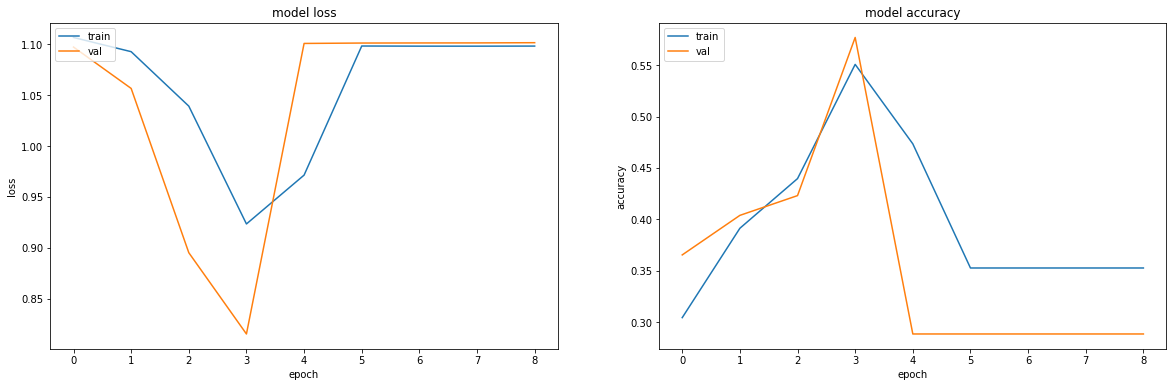

In [ ]:
plot_history(history)

### V 1.1


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(256, activation="relu"),
                             layers.Dense(128, activation="relu"),
                             layers.Dense(64, activation="relu"),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 397, 32)      1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 197, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 195, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 71, 96, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=16,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
13/13 [==============================] - 2s 177ms/step - loss: 0.4373 - accuracy: 0.8502 - val_loss: 0.6873 - val_accuracy: 0.7308
Epoch 2/50
13/13 [==============================] - 2s 170ms/step - loss: 0.4046 - accuracy: 0.8696 - val_loss: 0.5190 - val_accuracy: 0.8077
Epoch 3/50
13/13 [==============================] - 2s 169ms/step - loss: 0.2382 - accuracy: 0.9034 - val_loss: 0.5699 - val_accuracy: 0.8269
Epoch 4/50
13/13 [==============================] - 2s 170ms/step - loss: 0.2199 - accuracy: 0.9227 - val_loss: 0.7921 - val_accuracy: 0.8269
Epoch 5/50
13/13 [==============================] - 2s 170ms/step - loss: 0.1897 - accuracy: 0.9275 - val_loss: 0.8506 - val_accuracy: 0.7885
Epoch 6/50
13/13 [==============================] - 2s 170ms/step - loss: 0.1447 - accuracy: 0.9662 - val_loss: 1.2276 - val_accuracy: 0.7500
Epoch 7/50
13/13 [==============================] - 2s 170ms/step - loss: 0.0676 - accuracy: 0.9807 - val_loss: 0.7958 - val_accuracy: 0.8462
Epoch 

nb d'epoch enregistrés : 22


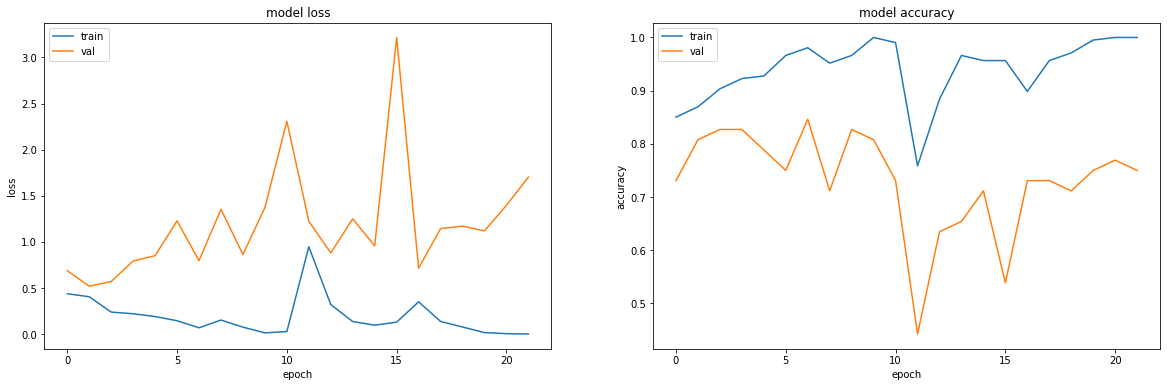

In [ ]:
plot_history(history)

### V 1.2


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
                             

    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.2),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_25 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 147, 197, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=16,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
13/13 [==============================] - 3s 198ms/step - loss: 1.1091 - accuracy: 0.3671 - val_loss: 1.1174 - val_accuracy: 0.3462
Epoch 2/50
13/13 [==============================] - 2s 177ms/step - loss: 1.1063 - accuracy: 0.4010 - val_loss: 1.0696 - val_accuracy: 0.4808
Epoch 3/50
13/13 [==============================] - 2s 178ms/step - loss: 1.0111 - accuracy: 0.4541 - val_loss: 0.7217 - val_accuracy: 0.7692
Epoch 4/50
13/13 [==============================] - 2s 177ms/step - loss: 0.9226 - accuracy: 0.6232 - val_loss: 0.7834 - val_accuracy: 0.6538
Epoch 5/50
13/13 [==============================] - 2s 177ms/step - loss: 0.7140 - accuracy: 0.6957 - val_loss: 0.5811 - val_accuracy: 0.7115
Epoch 6/50
13/13 [==============================] - 2s 177ms/step - loss: 0.5570 - accuracy: 0.7729 - val_loss: 0.6507 - val_accuracy: 0.6923
Epoch 7/50
13/13 [==============================] - 2s 178ms/step - loss: 0.5055 - accuracy: 0.8213 - val_loss: 0.4222 - val_accuracy: 0.8462
Epoch 

nb d'epoch enregistrés : 17


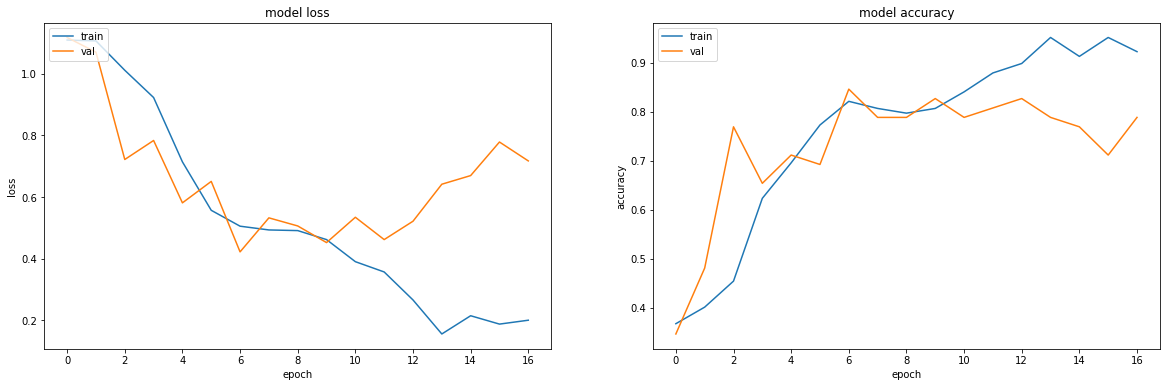

In [ ]:
plot_history(history)

### V 1.3


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
                             

    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             layers.Dropout(0.05),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.2),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  model.compile(
      loss="categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=0.0005),
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_57 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 147, 197, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=8,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
26/26 [==============================] - 7s 158ms/step - loss: 1.1028 - accuracy: 0.2947 - val_loss: 1.0972 - val_accuracy: 0.2885
Epoch 2/50
26/26 [==============================] - 2s 80ms/step - loss: 1.0838 - accuracy: 0.3865 - val_loss: 1.0239 - val_accuracy: 0.4231
Epoch 3/50
26/26 [==============================] - 2s 80ms/step - loss: 1.0228 - accuracy: 0.4734 - val_loss: 0.8736 - val_accuracy: 0.6346
Epoch 4/50
26/26 [==============================] - 2s 80ms/step - loss: 0.7271 - accuracy: 0.7585 - val_loss: 0.5362 - val_accuracy: 0.7692
Epoch 5/50
26/26 [==============================] - 2s 80ms/step - loss: 0.7166 - accuracy: 0.7198 - val_loss: 0.5264 - val_accuracy: 0.8077
Epoch 6/50
26/26 [==============================] - 2s 80ms/step - loss: 0.6074 - accuracy: 0.7923 - val_loss: 0.5322 - val_accuracy: 0.8077
Epoch 7/50
26/26 [==============================] - 2s 81ms/step - loss: 0.4701 - accuracy: 0.8406 - val_loss: 0.5009 - val_accuracy: 0.7885
Epoch 8/50
2

nb d'epoch enregistrés : 18


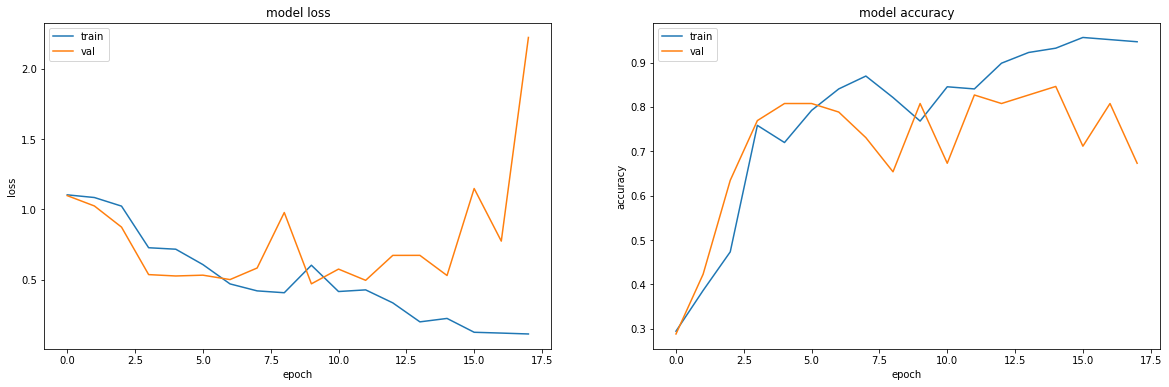

In [ ]:
plot_history(history)

In [ ]:
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=50, decay_rate=0.7,
)

### V 1.4


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
                             

    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             #layers.Dropout(0.05),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.2),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  initial_learning_rate = 0.005

  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
      # Every 5000 iterations, multiply the learning rate by 0.7
      initial_learning_rate, decay_steps=5, decay_rate=0.7,)

  model.compile(
      loss="categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_89 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 147, 197, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_91 (Conv2D)          (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=8,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
26/26 [==============================] - 3s 99ms/step - loss: 1.0826 - accuracy: 0.3237 - val_loss: 1.0955 - val_accuracy: 0.3462
Epoch 2/50
26/26 [==============================] - 2s 83ms/step - loss: 1.0287 - accuracy: 0.4734 - val_loss: 0.9373 - val_accuracy: 0.5385
Epoch 3/50
26/26 [==============================] - 2s 83ms/step - loss: 0.7676 - accuracy: 0.6329 - val_loss: 0.6089 - val_accuracy: 0.7500
Epoch 4/50
26/26 [==============================] - 2s 84ms/step - loss: 0.7191 - accuracy: 0.6812 - val_loss: 0.7185 - val_accuracy: 0.6923
Epoch 5/50
26/26 [==============================] - 2s 84ms/step - loss: 0.5880 - accuracy: 0.7729 - val_loss: 0.7275 - val_accuracy: 0.6923
Epoch 6/50
26/26 [==============================] - 2s 85ms/step - loss: 0.6173 - accuracy: 0.7343 - val_loss: 0.5426 - val_accuracy: 0.7500
Epoch 7/50
26/26 [==============================] - 2s 84ms/step - loss: 0.4764 - accuracy: 0.8261 - val_loss: 0.5692 - val_accuracy: 0.7500
Epoch 8/50
26

nb d'epoch enregistrés : 32


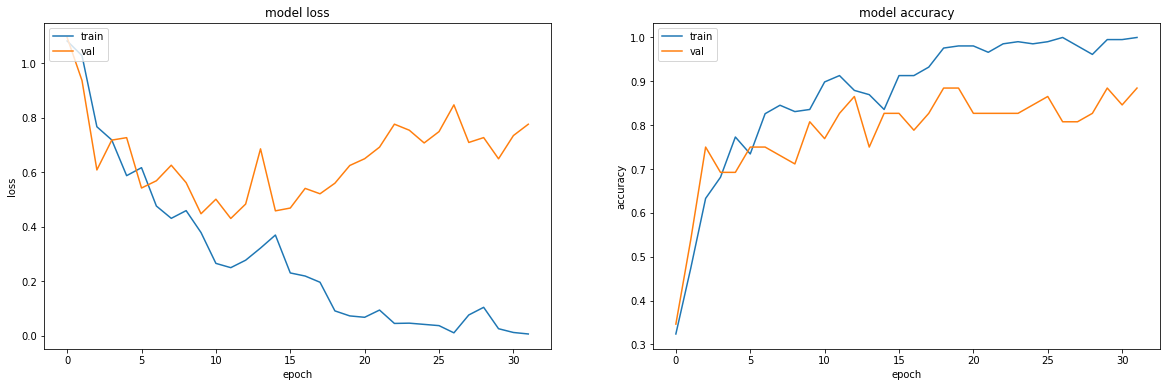

In [ ]:
plot_history(history)

In [ ]:
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=50, decay_rate=0.7,
)

### V 1.5


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
                             

    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             #layers.Dropout(0.05),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.5),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  initial_learning_rate = 0.005

  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
      # Every 5000 iterations, multiply the learning rate by 0.7
      initial_learning_rate, decay_steps=5, decay_rate=0.7,)

  model.compile(
      loss="categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 297, 397, 32)      1568      
                                                                 
 conv2d_103 (Conv2D)         (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 147, 197, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 145, 195, 64)      18496     
                                                                 
 conv2d_105 (Conv2D)         (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=8,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
26/26 [==============================] - 3s 92ms/step - loss: 1.0981 - accuracy: 0.3140 - val_loss: 1.0861 - val_accuracy: 0.3462
Epoch 2/50
26/26 [==============================] - 2s 83ms/step - loss: 1.0523 - accuracy: 0.3961 - val_loss: 1.0135 - val_accuracy: 0.4231
Epoch 3/50
26/26 [==============================] - 2s 83ms/step - loss: 0.9544 - accuracy: 0.4928 - val_loss: 0.8432 - val_accuracy: 0.6923
Epoch 4/50
26/26 [==============================] - 2s 84ms/step - loss: 0.7957 - accuracy: 0.6377 - val_loss: 0.6889 - val_accuracy: 0.7500
Epoch 5/50
26/26 [==============================] - 2s 84ms/step - loss: 0.6501 - accuracy: 0.7295 - val_loss: 0.5142 - val_accuracy: 0.8077
Epoch 6/50
26/26 [==============================] - 2s 85ms/step - loss: 0.5448 - accuracy: 0.7826 - val_loss: 0.4545 - val_accuracy: 0.8654
Epoch 7/50
26/26 [==============================] - 2s 84ms/step - loss: 0.4860 - accuracy: 0.8406 - val_loss: 0.4719 - val_accuracy: 0.8269
Epoch 8/50
26

nb d'epoch enregistrés : 31


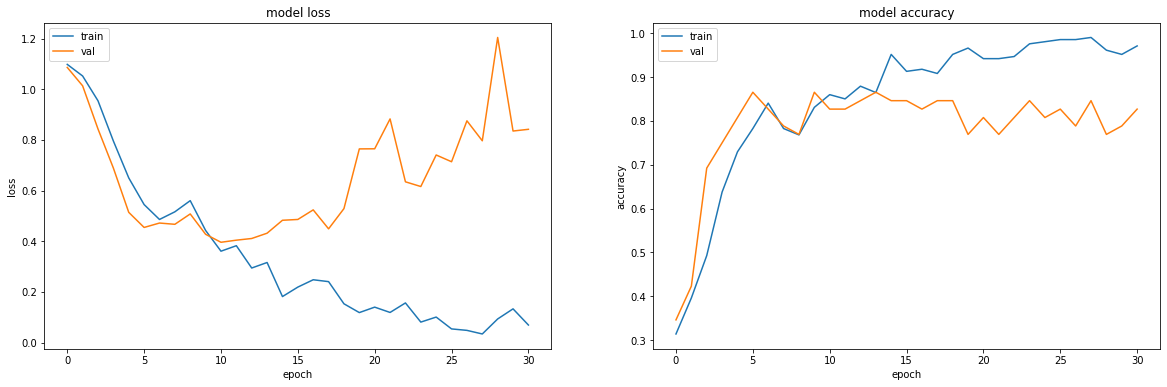

In [ ]:
plot_history(history)

### V 1.6


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
                             

    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             #layers.Dropout(0.05),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.5),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

#  initial_learning_rate = 0.001
#
#  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#      # Every 5000 iterations, multiply the learning rate by 0.7
#      initial_learning_rate, decay_steps=5, decay_rate=0.7,)

  model.compile(
      loss="categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 397, 32)      1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 197, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 195, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 71, 96, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=32,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
7/7 [==============================] - 20s 1s/step - loss: 1.0938 - accuracy: 0.3333 - val_loss: 1.0865 - val_accuracy: 0.3462
Epoch 2/50
7/7 [==============================] - 2s 291ms/step - loss: 1.0877 - accuracy: 0.3575 - val_loss: 1.0670 - val_accuracy: 0.3462
Epoch 3/50
7/7 [==============================] - 2s 294ms/step - loss: 1.0773 - accuracy: 0.3092 - val_loss: 1.0519 - val_accuracy: 0.3654
Epoch 4/50
7/7 [==============================] - 2s 293ms/step - loss: 1.0599 - accuracy: 0.3527 - val_loss: 1.0244 - val_accuracy: 0.3462
Epoch 5/50
7/7 [==============================] - 2s 294ms/step - loss: 1.0289 - accuracy: 0.4541 - val_loss: 0.9621 - val_accuracy: 0.4423
Epoch 6/50
7/7 [==============================] - 2s 292ms/step - loss: 0.9802 - accuracy: 0.5024 - val_loss: 0.9189 - val_accuracy: 0.7308
Epoch 7/50
7/7 [==============================] - 2s 295ms/step - loss: 0.8867 - accuracy: 0.6377 - val_loss: 0.7851 - val_accuracy: 0.8269
Epoch 8/50
7/7 [======

nb d'epoch enregistrés : 43


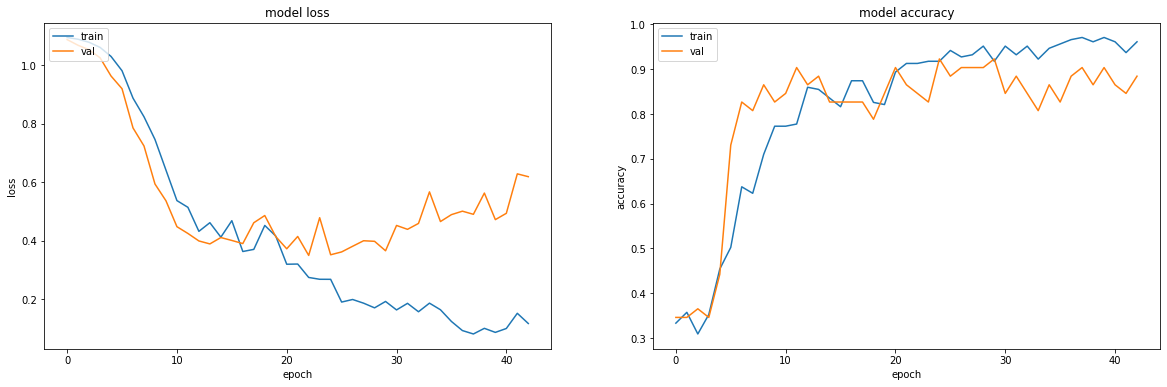

In [ ]:
plot_history(history)

In [ ]:
loss, accuracy= model.evaluate(X_test, y_test_cat)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
predictions = model.predict(X_test).argmax(axis=1)
labels = y_test_cat.argmax(axis=1)
# Evaluating confusion matrix
res = tf.math.confusion_matrix(labels,predictions)
# Printing the result
print('Confusion_matrix:\n',np.array(res))

1/1 [==============================] - 0s 119ms/step - loss: 0.6175 - accuracy: 0.7586
Test loss: 0.62
Test accuracy: 75.86%
Confusion_matrix:
 [[10  0  0]
 [ 4  5  1]
 [ 2  0  7]]


In [ ]:
model.save('/content/drive/MyDrive/Datasets/bear_plk/model_V1.6.h5')

### V 1.7 batchnorm


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.BatchNormalization(),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.BatchNormalization(),
                             
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.BatchNormalization(),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.BatchNormalization(),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             #layers.Dropout(0.05),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.5),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

#  initial_learning_rate =0.0001
#  lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=10, decay_rate=1)

  model.compile(
      loss="categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      metrics=["accuracy"])
  return model


In [ ]:
model='toto'
model = initialize_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_71 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 batch_normalization_9 (Batc  (None, 294, 394, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 147, 197, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_73 (Conv2D)          (None, 143, 193, 64)    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=32,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
7/7 [==============================] - 3s 365ms/step - loss: 1.2682 - accuracy: 0.3913 - val_loss: 1.1055 - val_accuracy: 0.2885
Epoch 2/50
7/7 [==============================] - 2s 318ms/step - loss: 0.9193 - accuracy: 0.5507 - val_loss: 1.1291 - val_accuracy: 0.2885
Epoch 3/50
7/7 [==============================] - 2s 320ms/step - loss: 0.7688 - accuracy: 0.6715 - val_loss: 1.1630 - val_accuracy: 0.2885
Epoch 4/50
7/7 [==============================] - 2s 321ms/step - loss: 0.6018 - accuracy: 0.7391 - val_loss: 1.2551 - val_accuracy: 0.2885
Epoch 5/50
7/7 [==============================] - 2s 319ms/step - loss: 0.3893 - accuracy: 0.8454 - val_loss: 1.3767 - val_accuracy: 0.2885
Epoch 6/50
7/7 [==============================] - 2s 319ms/step - loss: 0.2997 - accuracy: 0.8889 - val_loss: 1.4520 - val_accuracy: 0.2885
Epoch 7/50
7/7 [==============================] - 2s 319ms/step - loss: 0.2810 - accuracy: 0.9130 - val_loss: 1.5414 - val_accuracy: 0.2885
Epoch 8/50
7/7 [====

nb d'epoch enregistrés : 50


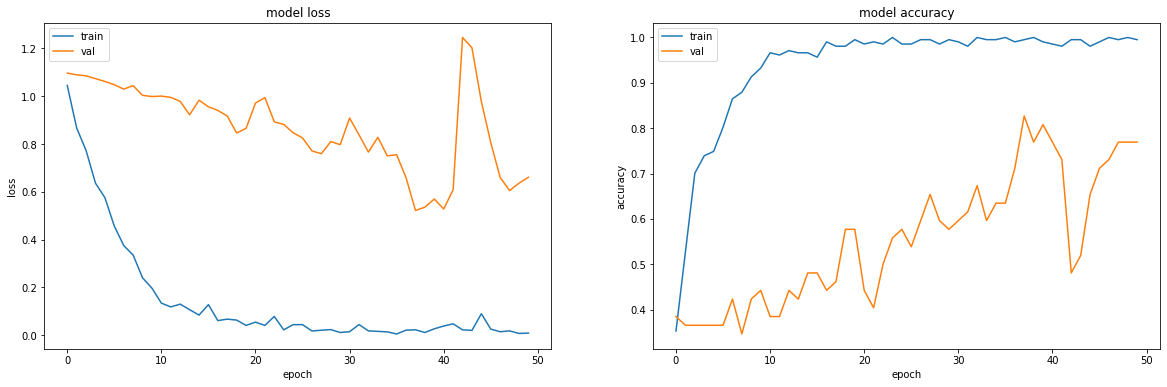

In [ ]:
plot_history(history)
# Ici on a ajouté un unique batchnorn apres toute la partie conv pool et avant le dernier pool
# Resultat le resau s'adapte plus vite au train et pas à val

In [ ]:
plot_history(history)
# Ici on a ajouté un unique batchnorn apres toute la partie conv pool et avant le dernier pool
# Resultat le resau s'adapte plus vite au train et pas à val

In [ ]:
loss, accuracy= model.evaluate(X_test, y_test_cat)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
predictions = model.predict(X_test).argmax(axis=1)
labels = y_test_cat.argmax(axis=1)
# Evaluating confusion matrix
res = tf.math.confusion_matrix(labels,predictions)
# Printing the result
print('Confusion_matrix:\n',np.array(res))

1/1 [==============================] - 0s 121ms/step - loss: 0.6806 - accuracy: 0.7931
Test loss: 0.68
Test accuracy: 79.31%
Confusion_matrix:
 [[10  0  0]
 [ 2  6  2]
 [ 1  1  7]]


In [ ]:
#model.save('/content/drive/MyDrive/Datasets/bear_plk/model_V1.6.h5')

### V 1.8 data augmentation


In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.BatchNormalization(),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.BatchNormalization(),
                             
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.BatchNormalization(),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.BatchNormalization(),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),
    ### fully connected
                             layers.Dense(128, activation="relu"),
                             #layers.Dropout(0.05),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dropout(0.5),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

#  initial_learning_rate =0.0001
#  lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=10, decay_rate=1)

  model.compile(
      loss="categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      metrics=["accuracy"])
  return model


In [ ]:
model='toto'
model = initialize_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_71 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 batch_normalization_9 (Batc  (None, 294, 394, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 147, 197, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_73 (Conv2D)          (None, 143, 193, 64)    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=32,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
7/7 [==============================] - 3s 365ms/step - loss: 1.2682 - accuracy: 0.3913 - val_loss: 1.1055 - val_accuracy: 0.2885
Epoch 2/50
7/7 [==============================] - 2s 318ms/step - loss: 0.9193 - accuracy: 0.5507 - val_loss: 1.1291 - val_accuracy: 0.2885
Epoch 3/50
7/7 [==============================] - 2s 320ms/step - loss: 0.7688 - accuracy: 0.6715 - val_loss: 1.1630 - val_accuracy: 0.2885
Epoch 4/50
7/7 [==============================] - 2s 321ms/step - loss: 0.6018 - accuracy: 0.7391 - val_loss: 1.2551 - val_accuracy: 0.2885
Epoch 5/50
7/7 [==============================] - 2s 319ms/step - loss: 0.3893 - accuracy: 0.8454 - val_loss: 1.3767 - val_accuracy: 0.2885
Epoch 6/50
7/7 [==============================] - 2s 319ms/step - loss: 0.2997 - accuracy: 0.8889 - val_loss: 1.4520 - val_accuracy: 0.2885
Epoch 7/50
7/7 [==============================] - 2s 319ms/step - loss: 0.2810 - accuracy: 0.9130 - val_loss: 1.5414 - val_accuracy: 0.2885
Epoch 8/50
7/7 [====

nb d'epoch enregistrés : 50


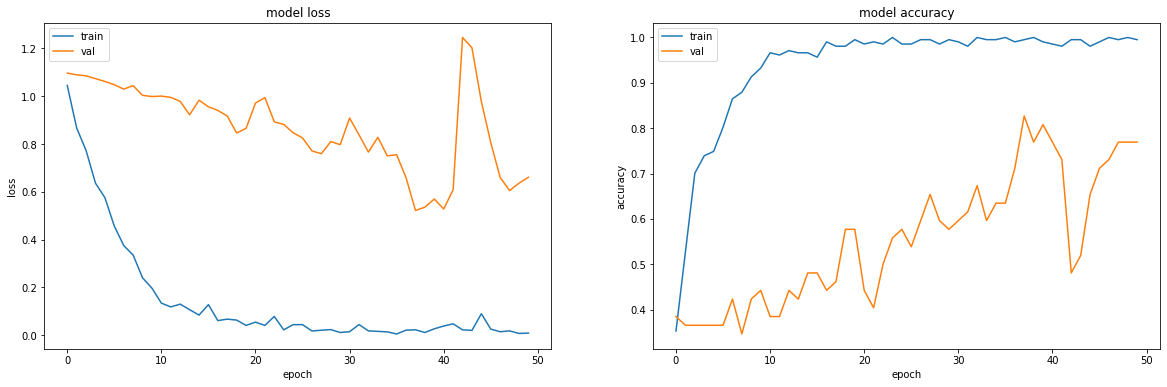

In [ ]:
plot_history(history)
# Ici on a ajouté un unique batchnorn apres toute la partie conv pool et avant le dernier pool
# Resultat le resau s'adapte plus vite 

In [ ]:
plot_history(history)

In [ ]:
loss, accuracy= model.evaluate(X_test, y_test_cat)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
predictions = model.predict(X_test).argmax(axis=1)
labels = y_test_cat.argmax(axis=1)
# Evaluating confusion matrix
res = tf.math.confusion_matrix(labels,predictions)
# Printing the result
print('Confusion_matrix:\n',np.array(res))

1/1 [==============================] - 0s 121ms/step - loss: 0.6806 - accuracy: 0.7931
Test loss: 0.68
Test accuracy: 79.31%
Confusion_matrix:
 [[10  0  0]
 [ 2  6  2]
 [ 1  1  7]]


In [ ]:
#model.save('/content/drive/MyDrive/Datasets/bear_plk/model_V1.6.h5')